<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-05 07:06:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  52.2MB/s    in 0.7s    

2024-11-05 07:06:15 (52.2 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


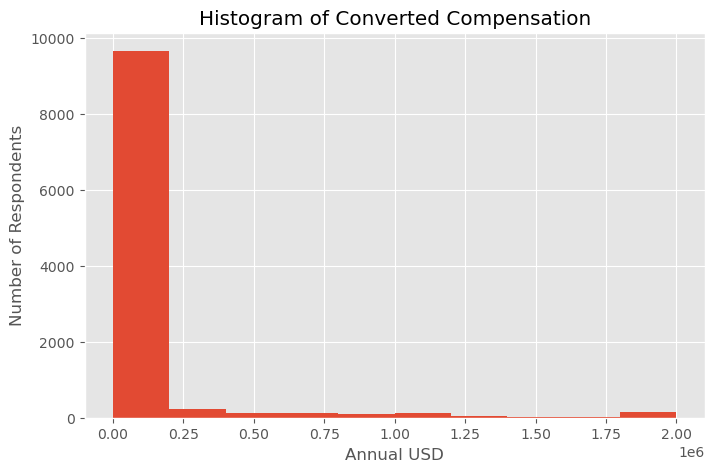

In [9]:
#matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')  # optional: for ggplot-like style


QUERY = """
SELECT Respondent, ConvertedComp
FROM master
"""
df_ConvertedComp = pd.read_sql_query(QUERY,conn)

# plot histogram
df_ConvertedComp['ConvertedComp'].plot(kind='hist', figsize=(8, 5))
# add a title to the histogram
plt.title('Histogram of Converted Compensation')
# add y-label
plt.ylabel('Number of Respondents')
# add x-label
plt.xlabel('Annual USD')

plt.show()

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

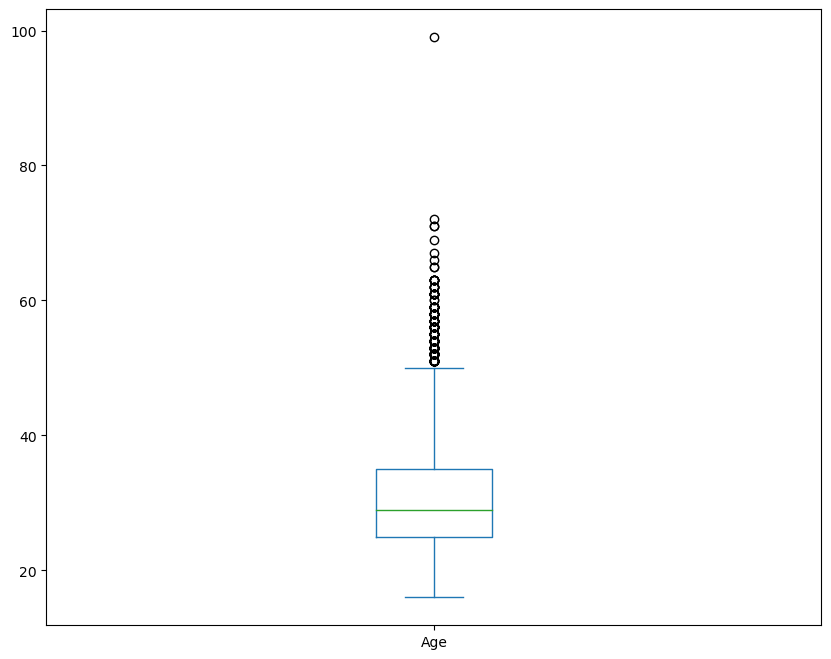

In [6]:
Query2 = """
SELECT Age 
FROM master
"""

Age= pd.read_sql_query(Query2, conn)
Age.plot(kind='box', figsize=(10, 8))


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


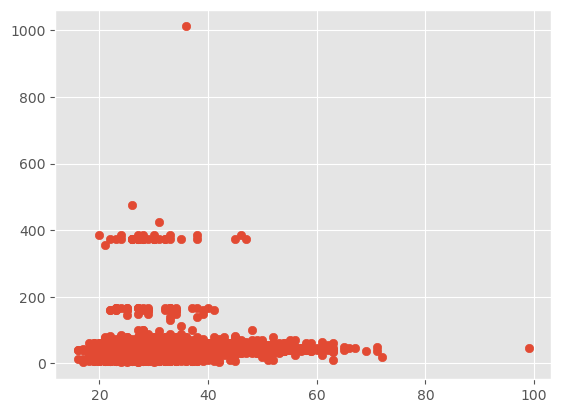

In [10]:
Query3= """
SELECT Age
FROM master
"""
Query4= """
SELECT WorkWeekHrs
FROM master
"""

Query5="""
SELECT Age, WorkWeekHrs
FROM master
"""
Age=pd.read_sql_query(Query3, conn)
WorkWeekHrs= pd.read_sql_query(Query4, conn)
Age_WorkWeekHrs=pd.read_sql_query(Query5, conn)
plt.scatter(x=Age, y=WorkWeekHrs)


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


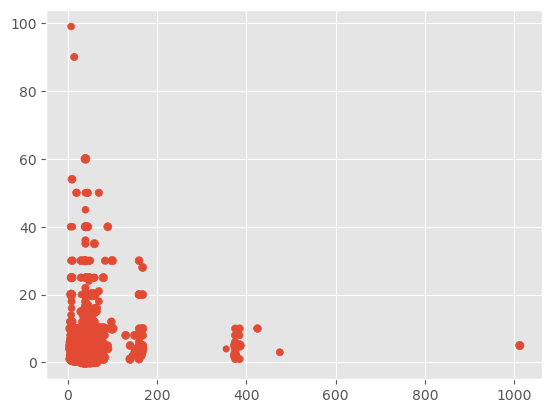

In [11]:
Query6 = """
SELECT CodeRevHrs 
FROM master
"""
CodeRevHrs=pd.read_sql_query(Query6, conn)
plt.scatter(x=WorkWeekHrs, y=CodeRevHrs, s=Age)



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


([<matplotlib.patches.Wedge at 0x7f3d4850a6d0>,
 [Text(1.1736914154044327, 1.1597191303957783, 'PostgreSQL'),
  Text(-0.9921837807065633, 1.3183593384592953, 'MongoDB'),
  Text(-1.5602426637717488, -0.536789372236856, 'Redis'),
  Text(-0.08034500476514456, -1.6480426815496283, 'MySQL'),
  Text(1.4365316698453372, -0.8117122405947613, 'Elasticsearch')],
 [Text(0.6401953174933268, 0.6325740711249699, '24.8%'),
  Text(-0.5411911531126707, 0.71910509370507, '20.9%'),
  Text(-0.8510414529664083, -0.292794203038285, '19.1%'),
  Text(-0.043824548053715204, -0.8989323717543425, '18.8%'),
  Text(0.7835627290065474, -0.4427521312335061, '16.4%')])

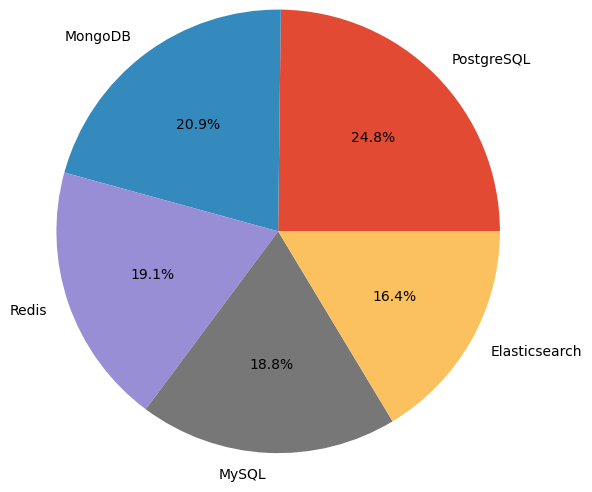

In [12]:
Query7="""
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""

DatabaseDesireNextYear= pd.read_sql_query(Query7, conn)
x = DatabaseDesireNextYear['count']
label = DatabaseDesireNextYear['DatabaseDesireNextYear']
plt.pie(x, labels=label, autopct='%1.1f%%',radius=1.5)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


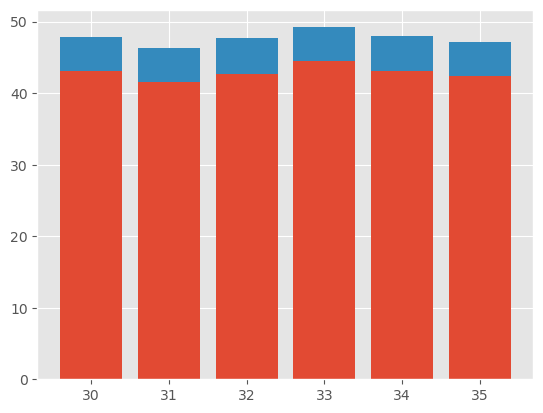

In [13]:
Query8 = """
SELECT Avg(WorkWeekHrs), Avg(CodeRevHrs), Age 
FROM master 
where Age between 30 and 35
group by Age
"""

z = pd.read_sql_query(Query8, conn)
WorkWeekHrs= z['Avg(WorkWeekHrs)']
CodeRevHrs= z['Avg(CodeRevHrs)']
Age= z['Age']

fig, ax = plt.subplots()

ax.bar(Age, WorkWeekHrs, label='WorkWeekHrs')
ax.bar(Age, CodeRevHrs, bottom=WorkWeekHrs,
       label='CodeRevHrs')

plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


    Avg(ConvertedComp)   Age
0        187374.012821  45.0
1        231703.737705  46.0
2        142093.126984  47.0
3        157251.532258  48.0
4        214709.000000  49.0
5        143120.464286  50.0
6        123404.666667  51.0
7        255217.236842  52.0
8        257196.758621  53.0
9        144287.041667  54.0
10       150508.583333  55.0
11       107843.357143  56.0
12       127548.700000  57.0
13       332839.833333  58.0
14       350231.800000  59.0
15       132287.500000  60.0


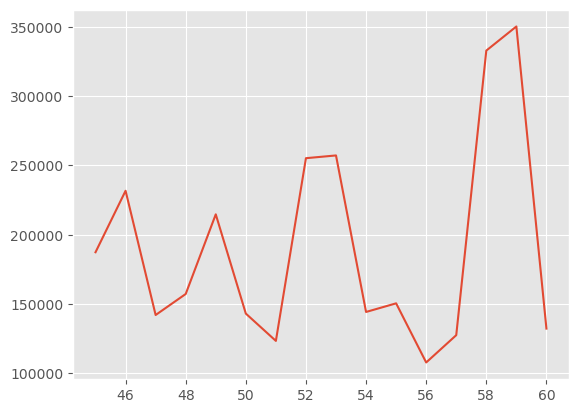

In [14]:
Query9= """
SELECT Avg(ConvertedComp), Age
FROM master
where age between 45 and 60
group by Age
"""
ConvertedComp_Age= pd.read_sql_query(Query9, conn)
ConvertedComp_Age
plt.plot(ConvertedComp_Age['Age'],ConvertedComp_Age['Avg(ConvertedComp)'])
print(ConvertedComp_Age)

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


,MainBranch,count(*)
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


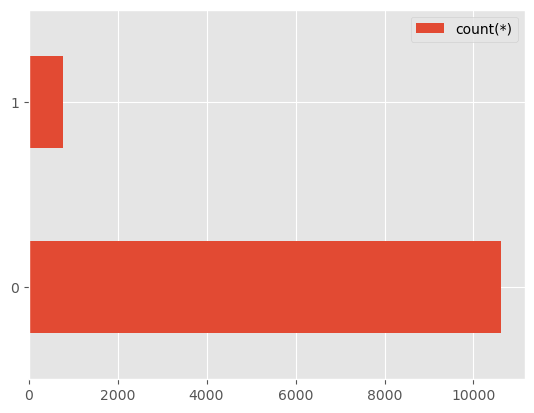

In [15]:
# your code goes here
Query10="""
SELECT MainBranch, count(*)
FROM master
group by MainBranch
"""
MainBranch=pd.read_sql_query(Query10, conn)
MainBranch.plot(kind='barh')
MainBranch



Close the database connection.


In [16]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
